# Convolutional Neural Networks for Deep Computer Vision


How to we know when you look at a picture of acute puppy, that you are actually looking at a cute puppy or how can you tell that it is in fact cute? It is just obvious is it not? Well **our perception of things lies outside the realm of our consciousness**. **Perception takes place in specialised visual, auditory and other sensory modules in the brain**. By  the time we actually consciously recognise something, it is already imbued with high-level features that enable us to recognise the subject. So to understand how this works, we must understand the sensory modules in the brain.

CNNs emerged from a study of the brain's visual cortex. They were initially used in image-recognition tasks, but more recently, there are applied to some more complex visual tasks. They are used in self-driving cars, search services and automatic video classificatio systems, just to name a few. But they are are not limited to solely these tasks. They are also successful in voice recognition and natural language processing tasks. This notebook will focus on visual applications.


Two smart guys, studied the structure of the visual corte in cats. They found that neurons in the visual cortex have a small local receptive field. This means that these neurons would react only to visual stimuli located in a limited region of the visual field. The visual fiels may overlap and together they can tile up the whole visual field.

![visual%20cortex%20recpetive%20field.PNG](attachment:visual%20cortex%20recpetive%20field.PNG)



The two smart guys went on to show that some neurons react to lines of s aspecific orientation, for example, some neurons would react to horizontal lines, and some to vertical lines. Futher more, some neurons can have the same visual field but react to lines of different orientation.They also noticed that some neurons have larger receptive fields and that they were reacting to more complex patterns that are in fact combinations of low-level patterns. Thus this lead to the fact that higher-level neurons are based on the outputs of neighboring lower-level neurons. This architecture is powerful enough to detect complex patterns in any area of the visual field. This lead to the conception of the Neocognitron, which evolvedinto the Convolutional Neural Network.

There are two huilding blocks from the CNN which we will divide into: 

**1. Convolutional Layers**

**2. Pooling Layers**


## Convolutional Layers
------------------------------------------------------------------------------------------------------------------------
Convolutional Layers are the most important building block the CNN. We should know that neurons in the first convolutional layer are not connected to every single pixel in the input image. But only to pixels in their receptive fields. And then, each neuron in the seecond convolution layer is connected only to neurons in the small rectangle in the first layer.This architecture allows the network to concentrate on small low-level features, and then assemble them into higher-level features in the layers that follow.This is the reason why CNNs work so well for image recognition.

![CNN%20Layers.PNG](attachment:CNN%20Layers.PNG)


A neuron located in row i, column j of a given layer is connected to the outputs of the neurons in the previous layer located in rows i to i + fh – 1, columns j to j + fw – 1, where fh and fw are the height and width of the receptive field. In order for a layer to have the same height and width as the previous layer, it is common to add zeros around the inputs, as shown in the diagram. This is called zero padding. The image below shows us the above.

![Connections%20and%20Zero%20Padding.PNG](attachment:Connections%20and%20Zero%20Padding.PNG)



It is possible to connect a large input convolution layer to a smaller convolutional layer. This is usually done to reduce the computational complexity of a model. This connection is done by spacing out the receptive fields. The shift from one receptive field to the next is called the stride. The image below shows how it is used. The diagram has a 5x7 input  layer (with zero padding therefore 7x9) is connected to a 3x4 layer. All the while using 3x3 receptive fields and stride of 2. the stride is the same in both x and y directions. However, it does not have to be so. So A neuron located in row i, column j in the upper
layer is connected to the outputs of the neurons in the previous layer located in rows i × sh to i × sh + fh – 1, columns j × sw to j × sw + fw – 1, where sh and sw are the vertical and horizontal strides. To my understanding, the previous formula does not make sense, maybe I am abit too slow for Aurelien's genius, but I understand it has we first the recepitve window size, from there we move to the right and bottom in strides of 2. Not only us result in the dimensions of the upper layer,but it makes sense to me. 

![reducing%20dimension%20using%20stride%202.PNG](attachment:reducing%20dimension%20using%20stride%202.PNG)


### Filters
-------------------------------------------------------------------------------------------------------------------------

Consider the image below:

![Features%20Maps.PNG](attachment:Features%20Maps.PNG)

First we can think of a neurons weights as being the size of the receptive field. And in the image, we see that there are two possible sets of weights called filters, we also call them convolutional kernels. The first one simply highlihghts vertical lines in the image and is represented by a 7x7 black square(mostly 0s) expect for the white(having 1s) vertical line in the middle. This gives us feature map 1. And the second onehighlights horizontal lines in the input image, tis isrepresented by a7x7 back square with a white horizontal line in the centre. The neurons will ignore everything in their receptive field except for the white lines.

Thus if all neurons in a layer use the same vertical line filter and the same bias term, and the network is fed the input image in the bottom, the result will be the top left image and the same applies for the top right image, where all neurons in a layer use the same horizontal line filter and the same bias term. **So we see that, a layer full of neurons using the same filter  outputs a feature map, used to highlihgt certain areas in the image that activate the filter**. We do not need to manually define feature maps, instead, during training the convolutional layer will automatically learn the most useful filters for the task and the layers above will learn to conmbine them into more complex patterns.

----------------------------------------------------------------------------------------------------------------------


### Stacking Multiple filters
-------------------------------------------------------------------------------------------------------------------------------

Consider the image below:

![COnv%20LAyers%20with%20multiple%20feature%20maps.PNG](attachment:COnv%20LAyers%20with%20multiple%20feature%20maps.PNG)


In reality,the output of a convolutional layer has multiple filters, and this parameter can be set by us. In addition, each filter outputs a feature map. So the above image shows a 3D Representation of the output of a conv. layer. It shuold be noted, all neurons within the same feature map share the same weights and bias term and that neurons in different feature maps, have different weights and bias terms. A neuron's receptive field is a paramter that we can set. Furthermore, a convolutional simultaneously appliesmultiple traininable filters to its inputs, making it capable of detecting multiple features anywhere in its inputs.

Input images are also composed of multiple sublayers: one per color channel. There are typically three: red, green, and blue (RGB). Grayscale images have just one channel, but some images may have much more—for example, satellite images that capture extra light frequencies (such as
infrared).

------------------------------------------------------------------------------------------------------------------------------
### Tensorflow Implementation

**FINALLY!!, we get to code**.

In TF, eachinput image is a 3D tensor, with a shape like this: [height, width, channels]. A mini-batch ofimags of the same shape is represented by shape [mini-batch size, height, width, channels]. The weights of a convolutional layer are represented by a 4D tensor of shape [fh,fw,fn',fn], where fn' is the no of feaeture maps in previously layer fn is the no of feature maps in present layer.Finally the bias term is a 1D vector with shape [fn]


Lets load a few images and see this in action.

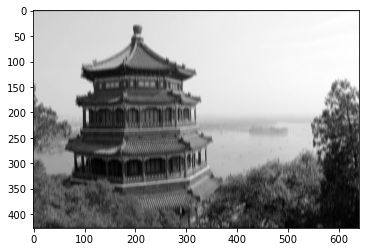

In [ ]:
import numpy as np
from sklearn.datasets import load_sample_image

#----------------------------------------------LOAD IMAGES-----------------------------------------------#
# Load the images using load_sample_image class
china = load_sample_image("china.jpg")/255
flower = load_sample_image("flower.jpg")/255

# Just wnat to see how the images look like!
#print(china)
#print(china.shape)

#Store images in an array
images = np.array([china, flower])

# Store mini-batch size, channels, height width in objects
batch_size, height, width, channels = images.shape


#----------------------------------------------CREATE 2 (7x7) FILTERS-----------------------------------------------#
filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)
filters[:,3,:,0] = 1 # Vertical Line
filters[3,:,:,1] = 1 # Horizontal Line 

#----------------------------------------------Apply Filters and view Output-----------------------------------------------#
import tensorflow as tf

outputs = tf.nn.conv2d(images,filters, strides=1, padding="SAME")

#PLot the images
import matplotlib.pyplot as plt

plt.imshow(outputs[0, :, :, 0], cmap ="gray") # plot 1st image's 1st feature map
#plt.imshow(outputs[0, :, :, 1], cmap ="gray") # plot 1st image's 2nd feature map
#plt.imshow(outputs[1, :, :, 0], cmap ="gray") # plot 2nd image's 1st feature map
#plt.imshow(outputs[1, :, :, 1], cmap ="gray") # plot 2nd image's 2nd feature map

plt.show()

# Important note:
# padding must be either "same" or "valid"

#### Plotting all the images to see what the filters did

In [ ]:
#Function to plot Grayscale and RGb Images
import matplotlib.pyplot as plt

def plot_image(image):
    #Show grayscale images
    plt.imshow(image, cmap="gray",interpolation = "nearest")
    plt.axis("off")
    
def plot_color_image(image):
    plt.imshow(image, interpolation = "nearest")
    plt.axis("off")

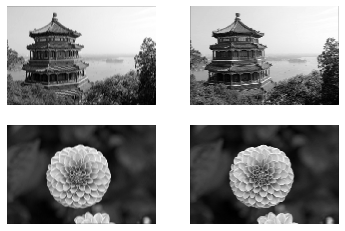

In [ ]:
# Show what both filters did to the images using subplots
# We have a list with 2 images, and each image has been filtered with 1 of 2 filters

for image_index in (0, 1):
    for filter_index in (0, 1):
        plt.subplot(2, 2, image_index*2 + filter_index + 1)
        plot_image(outputs[image_index, : ,: , filter_index])

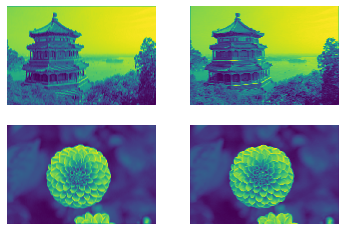

In [ ]:
# Show what both filters did to the images using subplots
# We have a list with 2 images, and each image has been filtered with 1 of 2 filters

for image_index in (0, 1):
    for filter_index in (0, 1):
        plt.subplot(2, 2, image_index*2 + filter_index + 1)
        plot_color_image(outputs[image_index, : ,: , filter_index])

#### Cropping the images to better see features

In [ ]:
print("Image dimensions: ", (width, height))
print(images.shape)
print(outputs.shape)

Image dimensions:  (640, 427)
(2, 427, 640, 3)
(2, 427, 640, 2)


In [ ]:
#Function to crop images

def crop_images(images):
    # Return images with width and height dimnesions decreased
    return images[150:220, 130:250]

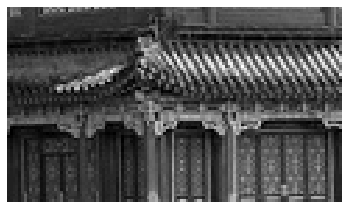

In [ ]:
#Cropping the first image (China.jpg)
cropped_image = crop_images(images[0, :, :, 0])
plot_image(cropped_image)
plt.show()

#### View the output shape of a Conv2D Layer and what features it picks up

In [ ]:
#----------------------------------------------Creating a Conv Layer-----------------------------------------------#
from tensorflow import keras
conv_layer_1 = tf.keras.layers.Conv2D(filters = 2, 
                                      kernel_size = 7, 
                                      strides = 1, 
                                      padding="SAME", 
                                      activation ="relu", input_shape = outputs.shape)

#### Explainiation of the above code:

In the above code, the Keras API is used to create the Convolutional Layer, without explicitly defining the filters.
We use 2 filters, which will produce 2 stacked feature maps. In addition, the receptive field size is 7x7 and a stride of 1 is used with same padding being implemented. Finally, each feature map is applied with a relu activation function tpo remove linearity within our feture maps.

This is the same as when we explicitly defined the filters in the code above.

-----------------------------------------------------------------------------------------------------------
Now the layer will be called and the outputs array will be passed as input. In addition the output shape will be viewed

In [ ]:
conv_layer_output = conv_layer_1(images)
conv_layer_output.shape


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



TensorShape([2, 427, 640, 2])

The output is a 4 Dimensional Tensor. The dimension: batch_size, height, width, no of filters.

1. Batch Size is 2 because we have 2 images.

2. Height and Width are the images dimensions(These values can change if we use a higher stride and use valid padding)

3. The conv layer has 2 filters, so the last dimension is 2.

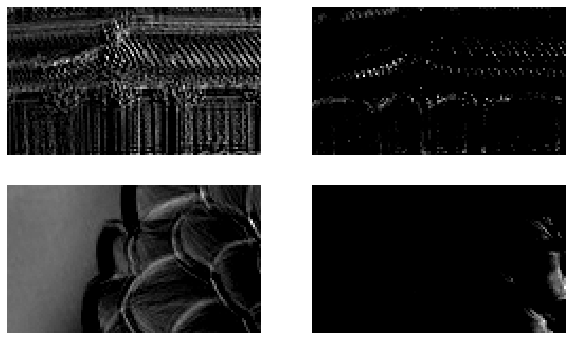

In [ ]:
# Lets see what the conv layer does:

plt.figure(figsize = (10,6))
for image_index in (0,1):
    for filter_index in (0,1):
        plt.subplot(2,2,image_index*2 + filter_index + 1)
        plot_image(crop_images(conv_layer_output[image_index, :, :, filter_index]))

plt.show()

**To change the output of the convolutional layer, simply run the code cell where the layer is defined. The output changes everytime the layer is re-run. Which makes sense**

#### TIP
-------------------------------------------------------------------------------------------------------------------------------
If training crashes because of an out-of-memory error, you can try reducing the minibatch size. Alternatively, you can try reducing dimensionality using a higher stride, or
removing a few layers. Or you can try using 16-bit floats instead of 32-bit floats. Or you
could distribute the CNN across multiple devices.

-------------------------------------------------------------------------------------------------------------------------------

## Pooling Layers
-------------------------------------------------------------------------------------------------------------------------------


![Types%20of%20Pooling.PNG](attachment:Types%20of%20Pooling.PNG)

Pooling works in the same manner as convolutional layers. Where each neuron in a pooling layer is connected to the outputs of a limited number of neurons in the previous layer, where these neurons are located within a small rectangular receptive field. **The objective of pooling layers is to shrink the input images in order to reduce the computational load, the memory usage,and the number of parameters, this limits the risk of overfitting**.

The Pooling layer is defined the same as the convolutional layer, in such that, it has a kernel size, a stride and a padding type, but one should note that pooling layers do not have weights, all it does it finds an average of the input using an aggregating function such as mean or max. This now tells that there are two types of pooling.

As the above image illustrates, the Max Pooling, will take the highest pixel value in the receptive field, and then construct the neuron, whereas, with Average pooling, an average of the pixel values in the receptive field will be computed and this mean will be used to construct the neurons.

The **most common type of pooling is Max Pooling**.

Other benefits of using pooling in convolutional networks, is that they introduce some level of invariance to small translations. This is illustrated in the image below. 

Consider the 3 images, A, B and C. Image B is shifted by one pixel to the right and image C is shifted 2 pixels to the right, both images using image A as a point of reference. Now, if we consider, light pixel values to be low and dark pixel values to have a high value and implement max pooling. The poolng layer outputs for image A and image B are the same. Howeverfor image C,the output is different. Thid now shows us what translational invariance means. 

![Translational%20Invariance.PNG](attachment:Translational%20Invariance.PNG)



Furthermore, by inserting max pooling every few layers layers in a CNN, it is possible to get some level of transaltional invariance at a large scale. Max Pooling also offers a small amount of rotational invariance and slight scale invariance. In essence, **invariance can be useful in cases where the prediction does not depend on thesedetails, such as classification tasks**.

We should not that sometimes, invariance is not desiredas we want to focus on these translational details, as well a, pooling does destroy information from the input image.

### Tensorflow Implementation

Implementing apooling layer(whether max or average pooling) using tensorflow is quite easy. The code below shows how it is done for both max pooling and average pooling. A 2x2kernel  is used, together with a stride of 2. The stride of 2 is a default keras value.

For more inforation on the pooling layers: https://keras.io/api/layers/pooling_layers/

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *

#------------------------------------MAx Pooling--------------------------#
max_pool = MaxPooling2D(pool_size=2)

#------------------------------------Average Pooling--------------------------#
max_pool = AvergaePooling2D(pool_size=2)

Pooling can be done along the depth dimension as opposed to the spatial dimension. This allows a CNN to learn to be invariant to various features. It can learn multiple features, with each feature map detecting a different rotation of the same pattern, and the depth-wise max pooling layer would ensure that the output is the same regardless of the rotation.In addition, the CNN would learn to be invariant to anything else like thick, brightness, skew, colour etc.


The image below shows how adepth-wise pooling layer was used to detect the same hand written digits regardless of rotation.

![Depth-Wise%20Pooling%20Layers.PNG](attachment:Depth-Wise%20Pooling%20Layers.PNG)

Keras does not include a depth-wise max pooling layer. However, Tensorflow's low-level Deep LEarning API does offer this capability. One has to make use of the `tf.nn.max_pool()` function. This function takes as input the following:

`tf.nn.max_pool(input, ksize, strides, padding, data_format=None, name=None)`

For more information on this function: https://www.tensorflow.org/api_docs/python/tf/nn/max_pool

The kernel size and strides need to be specified as 4-tuple(a tuple of size 4). The first 3 values should be 1(the stride and kernel size of the batch, height and width dimensions should be 1). Then the last value should bewhatever kernel size or stride we want for the depth dimension. For example 3, This must be a divisor of the input depth, 3 cannot work for an input depth of 20, which is the number of feature maps from the previous layer.


In [ ]:
output = tf.nn.max_pool(inputs = images, ksize = (1,1,1,3), strides = (1,1,1,3))

# To use this in a Keras Model,wrap it in a lambda layer

depth_pooling = Lambda(lambda X: tf.nn.max_pool(inputs = X, ksize = (1,1,1,3), strides = (1,1,1,3)))

# You can also use a custom layer.

Another type of pooling that is used is Global Average Pooling. It works in a differnt manner than other pooling techniques, it takes an average of the entire the feature map. Thus it outputs a single number per feature map and per instance.So its a pooling kernel, with the spatial dimensions as the inputs. This technique israther destructive but it can be useful when working as an output layer. 
To create such a layer, simply use the `keras.layers.GlobalAvgPool2D class`

## Prominent CNN Architectures
-------------------------------------------------------------------------------------------------------------------------------

So for this section of the notebook, I will not fully explain all the CNN architectures. I simply read abut then and I will supply all the links to the relevant papers. What I will cover in this section are some of the techniques the architects of these networks used to achieve such prominent sucess

### Awesome CNN Architectures and there papers

1. LeNet-5:  

2. AlexNet:  
3. GoogLeNet:  

4. VGGNet:  

5. ResNet:  

6. Xception:  

7. SENet:  

One of the reasons I did not go in depth with these architectures, I would not do them justice, rather it would be best for a reader to read about the architectures themselves. In addition, they are readily available to use through the Keras API: https://keras.io/api/applications/


-------------------------------------------------------------------------------------------------------------------------------

### Awesome techniques used in these networks

------------------------------------------------------------------------------------------------------------------------------

#### Local Response Normalization

This technique is a normalization technique applied after the lower convolutional layers in the AlexNet model. Its object basically is to force competitve activation amongst neurons in similiar regions in different feature maps. So the most strongly activated neurons inhibit other neurons at the same position in neighbouring feature maps. This encorages different feature maps to specialise , which pushes them apart to explore a wider range of features, thus improving generalization. In addition to this, just as a side note: The authors of AlexNet also stacked Convolutional Layerson top of one another.

The code below will show how we can implement this in Code:

1. Use the `tf.nn.local_response_normalization()` function from the Tensorflow low-level API

2. Wrap it in a Lambda Layer.

In [ ]:
lrn_layer = tf.keras.layers.Lambda(lambda X: tf.nn.local_response_normalization())

#### Inception Modules

The image below illustrates what an inception module is.

![Inception%20Modules.PNG](attachment:Inception%20Modules.PNG)



**Inception modules can be thought of Convolutional Layers on steroids**.

They output feature maps that capture complex patterns at various scales.

Lets explain the architecture of such modules:

The input signal is first copied and fed into 4 different layers. All the convolutional layers have different kernel sizes ranging 1x1, 3x3 and 5x5. This allows them to capture different patterns scales. In addition, every layerhas a stride of 1,meaning the traserve pixel by pixel through the images, and also they have "same" padding, even the Max Pooling layers. Thus the outputs have the same spatial dimensions as the inputs. This makes it easy for all the layer outputs to be concatenated along the depth dimension(`tf.concat(axis=3)`). So these modeules are used to capture patterns in the depth dimension and not the spatial dimensions. A very important aspect is that these modules output fewer feature maps that their inputs, thus they serve as bottlenecks. This implies they redce dimensoionality thus cutting computational costs, the number of parameters, speeding up training and also improving generalization.

**We can use the Functional API to construct these, or Construct a Custom Layer**

#### SE Blocks (Squeeze and Excitation Blocks)

SE blocks are added to original architectures, such as a ResNet or Inception network. We are basically adding a small neural network after each Res-Block or Inception module in a alarger network. This is illustrated in the image below:

![SE%20Block.PNG](attachment:SE%20Block.PNG)

The SE Block analyses the output of the unit it is attached to. It focuses only onthe depth dimension and learns features that aremost active together. It then uses this information to recalibrate the feature maps. For example, an SE blocks will learn tha mouths, noeses and eyes usually appear together in pictures. Therefore if you see a mouth and a nose, you can expect to see eyes. So if the SE Block sees a strong actiavtion in the mouths and nose feature maps but a moderate activation in the eyes feature map, then it will boost the eye feature map, by reducing the irrelevant feature maps. So if eyes are cpnfused with something else, the SE block will remove that confusion.

The SE Block has the following architecture:

![SE%20Block-2.PNG](attachment:SE%20Block-2.PNG)

## Using Pretrained Models from Keras

-------------------------------------------------------------------------------------------------------------------------------
Generally, we will not haveto manually implement these standard models  such asResNet or GoogleNet as they are readily availbale to us from the Keras Applications package(`keras.applications`): https://keras.io/api/applications/ We will do an example below of loading the ResNet-50, pretrained on ImageNet and make it make predictions on the 2 images we loaded earlier.

In the code that follows we will load the model, and download ghe weights pretrained on ImageNet. In order to use this model, we will need to make sure that the images arethe right size. ResNet works with images of size 224x224 pixels, some other  models work with 299x299 pixels. But images can be resized using the `if.image.resize()` function. ONe can also use `tf.image.crop_resize()` , because resizeing does not preserve the aspect ratio. Thus images need to be cropped then resized.

Once we have loaded the model; its weights and resized our images,we need to preprocess the inputs, as the model assumes that the images are preprocessed in a certain way. In some cases they expect the pixels values to be scaled between (0,1) or (-1,1) etc. Each model provides a `preprocess_input()` function. These functions assume that the pixels range from 0-255, so for our example,we will need to multiply 255, as we scaled them earlier.

After that, we can call the `predict()` method on the model and make predictions. The output will be a matrix with one row per image and one column per class. 

ImgeNet has 1000 classes),so we probablywill not want all the results for every class. So we will have to display the top K predictions, this includes the class name and estimated probability of each class. This is done by using the `decode_predictions()` function. For each  image, it returns an array containing the top K predictions, where a single prediction is represented as an array containing the class identitfier, its name and the confidence score 


In [ ]:
images_resized = tf.image.resize(images, [224, 224])
plot_color_image(images_resized[0])
plt.show()

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# 1. Load the model
resnet_model = ResNet50(weights="imagenet")

# 2. Resize the images

images_resized = tf.image.resize(images, [224,224])

# 3.Preprocess the input

inputs = preprocess_input(images_resized)

# 4. Make predictions

predictions = resnet_model.predict(inputs)

# 5. Decode predictions and get top 4 predictions

top_k = decode_predictions(predictions, top=3)

# 6. Display Results
for image_index in range(len(images)):
    #Loop through images list
    print("Image_#{}".format(image_index))
    # Loop through top_k list. Which as 2 list of results(one for each image)
    for class_id, name, pred_score in top_k[image_index]:
        print(" {} - {:12s} {:.2f}%".format(class_id, name, pred_score * 100))
    print()

But what if you want to use an image classifier for classes of images that are not part of ImageNet? In that case, you may still benefit from the pretrained models to perform transfer learning.

## Pretrained Models for Transfer Learning
-------------------------------------------------------------------------------------------------------------------------------
Lets say you want to build an image classifier but you dont have sufcient training data. A solution to this problem, would be to use the lower layers of a pretrained model. We will train a model to classify images of flowers resuing a pretrained Xception model.

**Step 1: Load the data using the Tensroflow Datasets API**

The data will be laoded and get some information about the dataset by setting `with_info = True`. Also we should note that the dataset only as a training set, therefore, we will have to split the full training set into: Training, Validation and Testing. There is an API for that,and we will take the following proportions of the full training set: 10%: Test, 15%: Validation, 75%:Training, using the `Split.TRAIN.subsplit()` method


**Step 2: Preprocess the data**

A helper function will be created that applies the preprocessing we spoke about in the previous secction, namely, resize the images and apply the preprocess_input function to the input data. 

Thereafter, we create a tf pipeline and apply, transformations such as shuffling(`shuffle()`) the data, applying the preprocessing of the helper function using the `map()` function and batch(`batch()`) the data into batches of 32 and finally prefetch(`prefetch()`) it.

**NOTE**

-----------
One can also apply data augmentation by using functions such  `tf.image.random_crop()` to randomly crop the images, use `tf.image.random_flip_left_right()` to randomly flip the images horizontally, and so on 

-----------

In [ ]:
# Import the tfds module
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]


Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='tf_flowers',
    version=3.0.1,
    description='A large set of images of flowers',
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
    }),
    total_num_examples=3670,
    splits={
        'train': 3670,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
    redistribution_info=,
)

In [ ]:
#----------------------Get Some infomation about the dataset----------------------#

# 1. Get the number of elements

dataset_size = info.splits.total_num_examples
# 2. List of classes

classes = info.features["label"].names

# 3. Number of classes
num_classes = info.features['label'].num_classes

In [ ]:
# Training, Validation and Testing Split

#Load the datasets as per split
testing_set = tfds.load("tf_flowers", split = "train[:10%]", as_supervised=True)
validation_set = tfds.load("tf_flowers", split = "train[10%:25%]", as_supervised=True)
training_set = tfds.load("tf_flowers", split = "train[25%:]", as_supervised=True)


In [ ]:
#Load the preprocessing function for the Xception model
import tensorflow as tf
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions


def preprocessing_fn(images, labels):
  # First we resize the image
  image_resized = tf.image.resize(images, [224,224])
  processed_images = preprocess_input(image_resized)
  return processed_images, labels

In [ ]:
# Here we apply the preprocessing

#Training Set
batch_size=32
training_set = training_set.shuffle(1000)
training_set = training_set.map(preprocessing_fn).batch(batch_size).prefetch(1)

#Validation Set
validation_set = validation_set.map(preprocessing_fn).batch(batch_size).prefetch(1)

#Testing Set
testing_set = testing_set.map(preprocessing_fn).batch(batch_size).prefetch(1)

**Step 3: Load the Xception Model**

We will be using the Functional API to construct this model. We load the ception model and exclude the top by setting the `include_top = False`. This excludes a GlobalAveragePooling layer and a Dense Output Layer. So we will have to create our own GlobalAveragePooling layer and Dense Output layer.

The input to the global average pooling layer will be the base model's output(`base_model.output`). The Dataset has 5 classes.Thus the output layer in has 5 neurons and uses softmax activation function.

It is a good idea to freeze the weights of the pretrained layers at the beginning of training.This is done by iterating through the base models layers(`base_model.layers`), and setting the training parameter to false(`layer.trainable = False`).

**Step 4: Compile the Model and Train**

Compile the model and train it for about 6 epochs and plot the performance plots

In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *

#create the base model, where we will exclude the top

base_model = Xception(weights="imagenet", include_top=False)
avg_layer = GlobalAveragePooling2D()(base_model.output)
output_layer = Dense(units = num_classes, activation ="softmax")(avg_layer)
model = Model(inputs = base_model.input, outputs = output_layer)

83697664/83683744 [==============================] - 0s 0us/step


**Step 5: Unfreeze top layers and train again**

After the first round of training is done, we can unfreeze the base models layers by iterating through the base models layers(`base_model.layers`), and setting the training parameter to false(`layer.trainable = True`). Thereafter,we compile the model again and we train it again. Plot the performance plots. 

Compare the Round 1 and Round 2 Training Performance plots.

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

import tensorflow
#Compile the model
optimizer = tensorflow.keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss = "sparse_categorical_crossentropy", optimizer=optimizer, metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#Train the model
history_1 = model.fit(training_set, steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=validation_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)

Epoch 1/5
86/86 [==============================] - 29s 162ms/step - loss: 1.2921 - accuracy: 0.7936 - val_loss: 1.1218 - val_accuracy: 0.8143
Epoch 2/5
86/86 [==============================] - 14s 159ms/step - loss: 0.4108 - accuracy: 0.9066 - val_loss: 0.7132 - val_accuracy: 0.8603
Epoch 3/5
86/86 [==============================] - 14s 167ms/step - loss: 0.2376 - accuracy: 0.9371 - val_loss: 0.6537 - val_accuracy: 0.8640
Epoch 4/5
86/86 [==============================] - 15s 174ms/step - loss: 0.1235 - accuracy: 0.9618 - val_loss: 0.7362 - val_accuracy: 0.8621
Epoch 5/5
86/86 [==============================] - 14s 166ms/step - loss: 0.0689 - accuracy: 0.9775 - val_loss: 0.6822 - val_accuracy: 0.8621


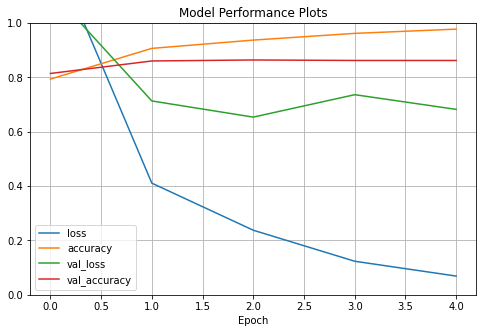

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(history_1.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Model Performance Plots")
plt.xlabel("Epoch")
plt.show()

In [ ]:
#Unfreeze Layers and train again
for layer in base_model.layers:
  layer.trainable = True


#Compile the model model again
optimizer = tensorflow.keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss = "sparse_categorical_crossentropy", optimizer=optimizer, metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#Train model again

In [ ]:
history_2 = model.fit(training_set, steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=validation_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=40)

Epoch 1/40
86/86 [==============================] - 58s 639ms/step - loss: 1.2446 - accuracy: 0.4764 - val_loss: 17.7295 - val_accuracy: 0.2077
Epoch 2/40
86/86 [==============================] - 54s 632ms/step - loss: 0.9959 - accuracy: 0.5883 - val_loss: 1.7880 - val_accuracy: 0.4761
Epoch 3/40
86/86 [==============================] - 54s 623ms/step - loss: 0.8093 - accuracy: 0.6842 - val_loss: 1.0101 - val_accuracy: 0.6507
Epoch 4/40
86/86 [==============================] - 55s 639ms/step - loss: 0.6419 - accuracy: 0.7576 - val_loss: 0.7834 - val_accuracy: 0.7463
Epoch 5/40
86/86 [==============================] - 55s 635ms/step - loss: 0.4912 - accuracy: 0.8180 - val_loss: 0.5647 - val_accuracy: 0.7868
Epoch 6/40
86/86 [==============================] - 55s 634ms/step - loss: 0.3925 - accuracy: 0.8619 - val_loss: 0.8703 - val_accuracy: 0.6967
Epoch 7/40
86/86 [==============================] - 55s 639ms/step - loss: 0.2856 - accuracy: 0.9004 - val_loss: 0.9313 - val_accuracy: 0.641

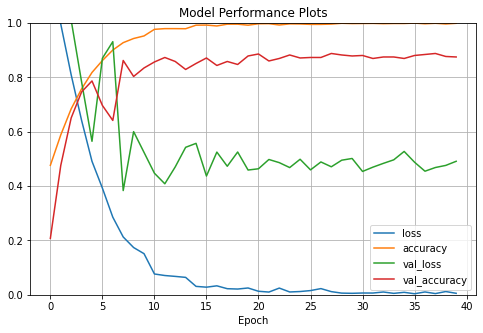

In [ ]:
pd.DataFrame(history_2.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Model Performance Plots")
plt.xlabel("Epoch")
plt.show()

In [ ]:
## Make some predictions
testing_set = tfds.load("tf_flowers", split = "train[:10%]", as_supervised=True)
testing_set = testing_set.map(preprocessing_fn).batch(batch_size).prefetch(1)
predictions_2 = model.predict(testing_set)
predictions_2.shape

(367, 5)

In [ ]:
import numpy as np

predictions_2 = np.argmax(predictions_2, axis = 1)
predictions_2

array([2, 3, 3, 0, 3, 0, 0, 0, 0, 1, 3, 0, 2, 1, 2, 1, 2, 4, 2, 2, 0, 0,
       0, 2, 0, 3, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 3, 1, 4, 1, 3, 0, 4,
       3, 3, 2, 2, 0, 1, 2, 0, 3, 0, 1, 4, 1, 3, 4, 3, 0, 0, 4, 0, 1, 1,
       0, 1, 2, 4, 3, 3, 0, 3, 4, 2, 1, 0, 3, 2, 0, 1, 4, 3, 0, 3, 3, 2,
       0, 2, 1, 4, 0, 3, 3, 3, 1, 2, 0, 4, 4, 4, 2, 0, 4, 0, 3, 4, 0, 0,
       2, 1, 4, 2, 2, 4, 0, 3, 3, 0, 3, 2, 0, 1, 2, 1, 4, 3, 0, 2, 0, 2,
       2, 4, 0, 3, 0, 0, 1, 2, 0, 3, 4, 3, 1, 4, 2, 0, 3, 3, 2, 0, 4, 0,
       4, 0, 4, 2, 1, 0, 2, 4, 0, 0, 0, 1, 1, 0, 4, 1, 4, 2, 3, 1, 0, 1,
       2, 3, 4, 0, 0, 3, 2, 4, 1, 0, 0, 4, 4, 2, 0, 3, 4, 0, 0, 2, 3, 2,
       0, 2, 2, 3, 4, 0, 1, 4, 0, 0, 1, 2, 1, 2, 2, 2, 1, 3, 4, 2, 4, 1,
       0, 0, 4, 4, 1, 0, 3, 2, 1, 4, 2, 1, 3, 0, 0, 1, 3, 2, 0, 1, 2, 4,
       0, 3, 1, 0, 0, 2, 4, 0, 4, 4, 2, 3, 0, 1, 1, 2, 2, 4, 1, 2, 3, 3,
       0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 3, 1, 2, 2, 3, 3, 3, 2, 0, 3, 3,
       4, 4, 4, 4, 2, 3, 3, 3, 0, 0, 2, 0, 2, 1, 0,

In [ ]:
predictions.shape

(367, 5)

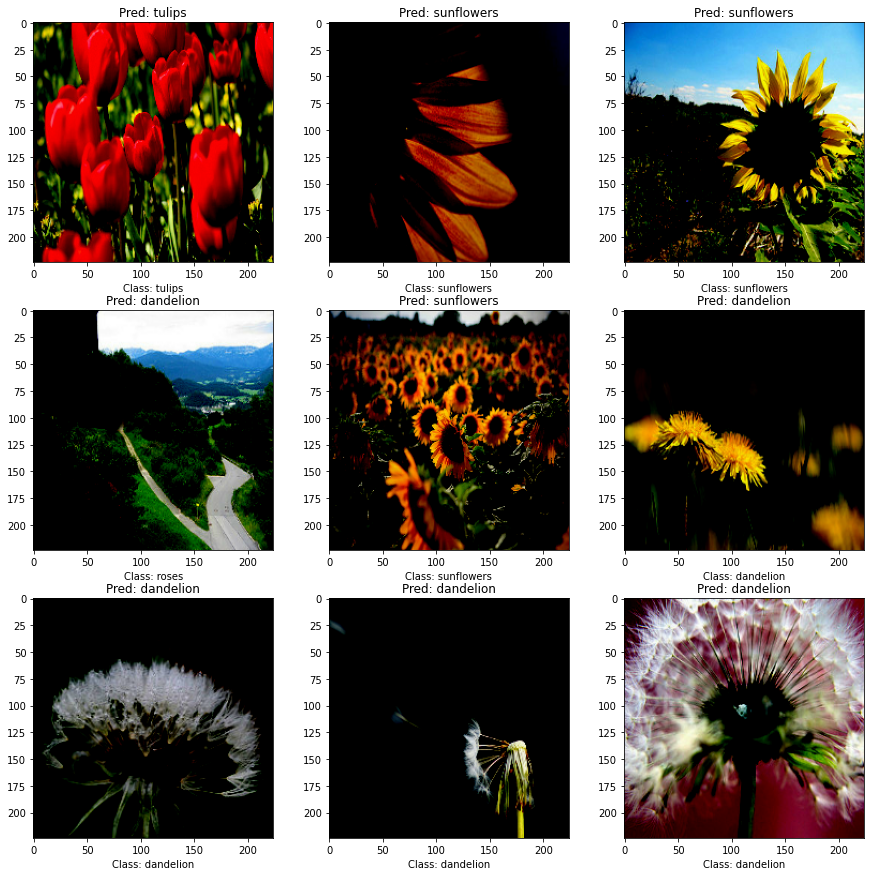

In [ ]:
#Print out Predictions
plt.figure(figsize=(15, 15))
for X_batch, y_batch in testing_set.take(1):
  for index in range(9):
    plt.subplot(3,3, index +1)
    plt.imshow(X_batch[index])
    plt.title("Pred: {}".format(classes[predictions_2[index]], loc = "right"))
    plt.xlabel("Class: {}".format(classes[y_batch[index]]))
   

plt.show()

## Classification and Localization
-------------------------------------------------------------------------------------------------------------------------------

So classification can be used to tell what an object in a picture is, however, to locate where the object is in the picture is localization. Localization is a regression task where, the centre coordinates of an object as well as its height and width are predicted. Thus wwe try to predict bounding boxes around the object in addition to it's centre coordinates.

In the model we used in the previous section, this can be done with addition of a dense output layer with neurons(one for each coordinate of the bounding box), then this output will be trainined using the MSE loss. When we compile the model, we will have a 2 loss functions in a list. One for classification: `sparse_categorical_crossentropy` and one for the regression task: `mse`. In addition to this, loss_weights parameter maybe used, depending on what is most important. The code below will illustrate:


In [ ]:
# Add an extra output
reg_output_layer = Dense(units=4)(avg_layer)
model = Model(inputs = base_model.input, outputs = [output_layer, reg_output_layer])

# Be careful when compiling to add appropriate loss function
# We place more importantance on the classification task than the localization tasks.
#This can be changed to suite the task at hand
model.compile(loss = ["sparese_categorical_crossentropy", "mse"], loss_weights = [0.8,0.2], optimizer= optimizer)

So we have discussed what we would do to perform localization in with regard to the model, however, the model must be trained on an appropriate dataset, one with different classes of flowers and also bounding boxes (In the form ofcoordinates) that model will have to learn. Currently, the flowers dataset does not have boudning boxes, and to label the dataset with bounding boxes would be an expensive task. In terms of time or in terms of money. There are a few options we can do:

1. Label the data yourself. Wont beas expensive in terms of money, but may well be time-consuming especially if you have a large dataset

2. Use any of the following platforms:

    a.) VGG Image Annotator
    
    b.) LabelImg
    
    c.) OpenLabler
    
    d.) ImgLab
    
    e.) LabelBox (Commercial)
    
    f.) Supervisely (Commercial)
    
    
3. Use crowdsouring platforms


Once the bounding boxeshave been obtained for every image in the dataset, now the next step, would be to create a dataaset whose observations include images together with their classes and bounding boxes. So each item should be a tuple of the form: `(image, (class_label, bounding_boxes))`. Once we are there, then all system go to train your model, using steps described above.

**TIP**

------------
The bounding boxes should be normalized so that the horizontal and vertical
coordinates, as well as the height and width, all range from 0 to 1. Also, it is common to
predict the square root of the height and width rather than the height and width directly:
this way, a 10-pixel error for a large bounding box will not be penalized as much as a
10-pixel error for a small bounding box.

-------------

As we previously stated, Localization isaregression tasks, thus the MSE loss function works fairly well to train the model, but it is not a great metric to evaluate how well the model can predict bounding boxes (SO FOR BOUNDING BOXES: DONT USE MSE). Rather we can use Intersection over Union (IoU) as a metric.This computes the area of overlap between the predicted bounding box and the actual bounding box, this is then divided by the area of their union.**(So a prediction would be correct if IoU is greater than or equal to 0.5)(The higher the IoU the more correct the bounding box)**. 

This can be implement in code by using `tensorflow.keras.MeanIoU` class

![IoU.PNG](attachment:IoU.PNG)

## Object Detection
-----------------------------
The process of classifying and localising an object in an image is called Object Detection. So this is done by sliding a CNN across an image, and as we do this the CNN will detect multiple portions of the image. Or rather if we have an image and that image has multiple objects.

The CNN will have mutliple bounding boxes across all these images, and we need to ensure, that we get the most correct bounding box on each object. This is achieved using Non-Max Suppresion Algorithm

#### Non-Max Suppression Algorithm
-------------------------------------

1. The algorithm will scan the image for objects using a CNN that traverses the image. The CNN will then output different bounding boxes for each image. Thus for a single image, we will have multiple bounding boxes. In addition to the bounding boxes, the CNN will output an "objectiveness" or "The probability that it has correctly localised an object" This "objectiveness" is linked to each bounding box


2. Next the algorithm will select only the bounding boxes with hightest objectiveness or chance.


3. Now, after it has selected the bounding box with a max objectiveness, it will scan and see how the other bounding boxes intersect or overlap with the max bounding box. Thus these bounding boxes (The ones that overlap the max) will be surpressed.


4. The result is then an image with objected localised with the most correct bounding boxes(max), and the other bounding boxes(non-max) are supressed.

------------------------------------------

Non-maxsupression algorithm is a great and effective simple way to deetect objects. Hwoever it is slow, since it requires the CNN to run many times as it scans the image. There is however a faster way to scan images.

### Fully Convolutional Networks (FCNs)
---------------------------------------------------
Fully Convolutional Networks were originally used in semantic segeantation, which is a task to classify every pixel in an image, according to the class of object ot belongs to).

The whole idea behind FCNs is to replace the top Dense layers of a CNN with convolutional layers. Seems a bit odd? Let me explain.

So suppose we a Dense layer with 200 neurons on top of a Convolutional Layer. The Convolutional layer outputs 100 feature maps, of size 7x7(mind you this is not the kernel size of the convolutinal layer). Thus each neuron in the convolutional lkayer will be weighted sum of the 100(number-of-feature-map) x 7x7(feature-map-size) plus the bias term. 

Suppose we replace the Dense layer with a Convolutional layer, with 200 filters, each with size 7x7(kernel-size) and using "valid" padding. This layer will output 200 1x1 feature-maps. Therefore similar to 200 neurons of the Dense Layer. The only difference between the output of the Dense Layer and Convolutional layer is the shape of he output. Dense: [batch_size,200]and Conv Layer: [batch_size, 1 ,1, 200].

So to convert a Dense layer to a Convolutional layer:

1. The number of filters of the convolutional layer **must be equal to** the number of units of dense layer

2. The filter size must be the same as the input feature maps (same size as input into dense layer).(Can be bent)

3. Use valid padding.

4. The stride maybe set to 1 or more.

So FCNs are important because convolutional layers can process images of any size, granted that they have required number of channels. This is a condition becuase a conv layer has a different set of weights per channel in the image. And FCNs are made up of conv layers and pooling layers, athey both have the same property.

Now remember, we replace dense layers with conv layers because conv layers can process images of any size, given that it has a correct number of channels. This needs to be grapsed before the next bit information

Consider the example of training a CNN for classification and Localization. The network was trained on 224x224 images and will output 10 numbers. The first 5 (0-4) are the different flower classes, with a number per class and are sent through a softmax function. The next number (5) will be the objectiveness probability of a flower being on theimage. This one will be sent through a logistic function, finally the last 4(6-9) will be the object  centre coordinates and the height and width of the bounding bx, these arenot sent through any activation function.

We can convert dense layers to convolutional layers, or convert the CNN to a FCN from the get go, before training.

Lets say that the last convolutional layer before the output layer (the bottleneck layer), outputs 7x7 sized feature maps when the network is fed 224x224 images. If the FCN is fed 448x448 images, the bottleneck will output 14x14 sized feature maps .

Since the dense layer was replaced with a convolution layer sing 10 filters of size 7x7 in addition to  to using "valid" padding and stride 1. The output will composed of 10 feature maps, each of size 8x8 (14-7+1). Thus the FCN will process the image once, and produce 8x8 grids, where each cell contains 10 numbers (5 class probabilities, 1 objectness score, and 4 bounding box coordinates). MAD!.

So its like chopping up the input image into a 14x14 grid, then using a 7x7 window to slide across the image 8 times per row and 8 times per column.

The FCN then is more efficient than CNN when it comes to object detection. A model called YOLO works in a similar way but is way more effective. Check out the demo on: https://www.youtube.com/watch?v=MPU2HistivI


![FCN.PNG](attachment:FCN.PNG)


## Exercises
-------------------


1. What are the advantages of a CNN over a fully connected DNN for image classification?
-------------------------------------------------------------------------------------------------------------------------------

    A.) A CNN has consecutive layers that are partially connected and also it heavily reuses its weights, a CNN ahas fewer parameters than a fully connected DNN. This results in  faster training, reduces  the risk of overfitting and requires less training data
   
    
    B.) When a CNN has learned a filter that can detect a certain feature. It can detect that feature anywhere in the image. However, a DNN learns a feature in one location and it can only detect that feature at that particular location. Images typically have very repetitve features, CNNs are able to generalize much better than DNNs for image processing tasks such as classification, using fewer training examples.
    
    
    
    C.) A DNN has no prior knowledge of how pixels are organized; it does not know that nearby pixels are close. A CNN's architecture embeds this prior knowledge. Lower layers typically indentify features in small areas of he images, while higher layers combine the lower-level features into larger features. This works well with most natural images giving CNNs a decisive head start compared to DNNs


2. Consider a CNN composed of three convolutional layers, each with 3 × 3 kernels, a stride of 2, and "same" padding. The lowest layer outputs 100 feature maps, the middle one outputs 200, and the top one outputs 400. The input images are RGB images of 200
× 300 pixels. What is the total number of parameters in the CNN? If we are using 32-bit floats, at least how much RAM will this network require when making a prediction for a single instance? What about when training on a mini-batch of 50 images?
------------------------------------------------------------------------------------------------------------------------------

So to calculate the parameters:

**Layer 1**: We have a input image of 3 channels and 3 x 3 filters plus a bias term therefore: (3 x 3 x 3) + 1 = 28 parameters per feature map that is outputed. We have 100 feature maps = 100 x 28 = 2800 parameters. T
    
**Layer 2**: The second layer will take the feature maps from Layer 1 as input. So there 100 (3x3) feature maps in total plus the bias term = 901. Therefore,second layer outputs 200 feature maps thus total parameters will be 901 x 200 = 180200 parameters.
    
**Layer 3**: This layer will take its input from layer 2, which are 200 feature maps of size 3 x 3 plus the bias term 1800 plus the bias term = 1801. Thus this layer outputs 400 feature maps thus has 1801 x 400 parameters = 720400 parameters
    

Therefore **total parameters = 2800 + 180200 + 720400 = 903400**

To calculate the RAM that will be used we start with the feature map size per layer. Since a stride of 2 and "same" padding is used, then in the first layer, the input image dimensions will be halved thus 100 x 150, this is the size of the feature(what comes out of the first conv layer), and we will have 100 of them. Therefore 100 x 100 x 150 = 1 500 000 then 32 bits = 4 bytes, therefore we  have 4 x 1500000 = 6000000 bytes = 6 MB. So the second layer: 4 x 200 x 50 x 75 = 3000000 B = 3MB and the third layer = 4 x 25 x 38 x 400 = 1520000 B = 1.52MB.

Once a layer is computed, the RAM occupied by the previous layer is released, so this mean we might need at least 9 MB RAM. If the 903400 parameters each using 4 bytes then we have 3.6 MB therefore in total at least 12.6 MB of RAM will be needed.

3. If your GPU runs out of memory while training a CNN, what are five things you could try to solve the problem?
-------------------------------------------------------------------------------------------------------------------
If the GPU runs out of memory while training a CNN, You can:

**Solution 1:** Reduce the  mini-batch size.

**Solution 2:** Reduce dimensionality using a larger stride in one or more layers.

**Solution 3:** Remove one or more layers.

**Solution 4:** Use 16-bit floats instead of 32-bit floats

**Solution 5:** Distribute the CNN across multiple devices (**Find out how this can be implemented**)

These solutions can beused even in Colab, as I had an issue where the GPU RAM ran out while I was training.


4. Why would you want to add a max pooling layer rather than a convolutional layer with the same stride?
-----------------------------------------------------------------------------------------------------------
A Max Pooling layer has no parameters. Thus using another Convolutional layer would significantly increase the number of parameters of the model.


5. When would you want to add a local response normalization layer?
------------------------------------------------------------------------
A local response normalization layer makes the neurons that most strongly activate inhibit neurons at the same location but in neighboring feature maps, this encourages different feature maps to specialise andpushes them apart, forcing them to explore a wider range of features. It is typically used in lower layers to have a larger pool of low-level features that the upper layers can build upon.

6. Can you name the main innovations in AlexNet, compared to LeNet-5? What about the main innovations in GoogLeNet, ResNet-35 SENet, and Xception?
-------------------------------------------------------------------------------------------------------------------------------

**AlexNet compared to LeNet-5**:

AlexNet is deeper and larger than LeNet-5. It was the first network to stack convolutional layers on top of one another, instead of using pooling layers right after a coonvolutional layer.


**Main Innovation of GoogLeNet:**

The main innovation with GoogLeNet, is the use of Inception modules, which are convolutional layers on steriods. Ghey make it possible to have a much deeper net than other architectures, with fewer parameters.

**Main Innovation with ResNet**

The introduction of skip connections. These make it possible to build large networks(in terms of number of layers),as well asthe simplicity consistency of the network.

**Main Innovation SENet**

The main innovation was the introduction of SE Blocks, fter every inception moduleor every residual unit in a ResNet. They are used to recalibrate the relative importance of feature maps.

**Main Innovation Xception**

The use of depth-wise seperable convolutional layers. These look at spatial and depth-wise patterns seperately.


7. What is a fully convolutional network? How can you convert a dense layer into a convolutional layer?
--------------------------------------------------------------------------------------------------------

A Fully Convolutional Network is a neural netowrk that consists of only Convolutional and Pooling Layers. FCNs can efficiently process images of any width and height(at least the abovbe the minimum size). They are most useful for object detection and semantic segmentation because they look at the image once instead of having the CNN parese through through the image multiple times.

To convert a Dense layer to a Convolutional Layer, we replace the first Dense layer after the last Pooling layer (The Bottleneck) with a Convolutional layer that has the same number of filters as the number of neurons ion the Dense layer. The kernel size must be the same as the input size into the Dense layer and finally valid padding must be used, in addition, a stride of  or more can be used. The same activation function used in the Dense layer must be used in the Conv layer. The other dense layers must be converted in the same manner. However, we should use 1x1 filters.

**QUESTION 8 DEALS WITH SEMANTIC SEGMENTATION WHICH WAS NOT COVERED IN THIS NOTEBOOK**.


9. Build your own CNN from scratch and try to achieve the highest possible accuracy on MNIST
--------------------------------------------------------------------------------------------

In [ ]:
import tensorflow as tf
import numpy as np
#import tensorflow_datasets as tfds


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
!pip install tensorflow

  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached libclang-14.0.1-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached absl_py-1.1.0-py3-none-any.whl (123 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  

In [ ]:
!pip install tensorflowjs

  Using cached tensorflowjs-3.18.0-py3-none-any.whl (77 kB)
  Using cached tensorflow_hub-0.12.0-py2.py3-none-any.whl (108 kB)
  Using cached packaging-20.9-py2.py3-none-any.whl (40 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.2 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.


  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3


In [ ]:
!pip install tflite

  Using cached tflite-2.4.0-py2.py3-none-any.whl (87 kB)


In [ ]:
!pip install tensorflow-datasets

  Using cached tensorflow_datasets-4.6.0-py3-none-any.whl (4.3 MB)
  Using cached etils-0.6.0-py3-none-any.whl (98 kB)
  Using cached tensorflow_metadata-1.9.0-py3-none-any.whl (51 kB)
  Using cached dill-0.3.5.1-py2.py3-none-any.whl (95 kB)
  Using cached promise-2.3.tar.gz (19 kB)
  Using cached importlib_resources-5.8.0-py3-none-any.whl (28 kB)
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21503 sha256=07c807054d4d892f01213b6a1d3c35bb96455cc6c6446db0ae42848df4181468
  Stored in directory: c:\users\uer\appdata\local\pip\cache\wheels\e1\e8\83\ddea66100678d139b14bc87692ece57c6a2a937956d2532608
Successfully built promise


## MNIST Code Challenge
--------------------------------------------------

Here I am going to build a model to train and test on the MNIST dataset. I intend to implement some of the techniques I learned in the this chapter. Mind you, some of the techniques maybe overkill, but I must want to get the ball rolling in terms getting used to using the techniques.

I want to use the following:

1. Build a preprocessing pipeline

2. I intend to you successive convolutional layers. Such as ALexNet

2. I intend to use to use Inception modules and see how they perform.

The final challenge I have for myself, will be to make a submission on Kaggle and see how it works.

In [20]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import kaggle
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

### Load the Data using TFDS
------------------------------------------------------

Chapter 13 covered how to use the tensorflow data sets api. which has a variety of datasets that one can use. I will use the MNIST data set for this example

In [21]:
# Load the dataset and information about the dataset
# I was getting errors, so I decided to run the exercise on Colab instead.

(training_set, val_set), dataset_info = tfds.load('mnist', split = ['train', 'test'], 
                                                  shuffle_files=True, 
                                                  as_supervised = True, 
                                                  with_info=True)

## Create a Preprocessing Pipeline.

In [22]:
# Create a helper function to do some preprocessing
# A Preprocessing layer is going to be inclued to randomly flip and rotate the images as we go

# Defining the preprocessing layer
# This layer takes care of the scaling, and the augmentation bro

data_augmentation = tf.keras.Sequential([RandomFlip("horizontal_and_vertical"), RandomRotation(0.2)])
rescaling = tf.keras.Sequential([Rescaling(1./255.0)])


def preprocessing(ds, augmentation = False):
  # Apply the rescaling
  ds = ds.map(lambda x, y: (rescaling(x), y), num_parallel_calls = tf.data.AUTOTUNE)

  # Apply the augmentation
  if augmentation:
    ds = ds.map(lambda x, y: (data_augmentation(x), y), num_parallel_calls = tf.data.AUTOTUNE)

  # Shuffle the data
  ds = ds.shuffle(1000)

  # Batch the data
  ds = ds.batch(32)

  return ds.prefetch(tf.data.AUTOTUNE)


### Apply the preprocessing function to the data set

In [23]:
aug_training_Set = preprocessing(training_set, augmentation = True)
val_set = preprocessing(val_set)

# Build the model

### First though, An inception module layer needs to be built.

In [24]:
input_img = Input(shape = (28, 28, 1))
##------------------------------------------------------------INCEPTION MODULE--------------------------------------------------------------

tower_1 = Conv2D(64, (1,1), padding='same', activation='relu', input_shape = (28,28,1))(input_img)
tower_1_a = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)



tower_2 = Conv2D(64, (1,1), padding='same', activation='relu', input_shape = (28,28,1))(input_img)
tower_2_a = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)



tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same', input_shape = (28,28,1))(input_img)
tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)

inception_output = concatenate([tower_1_a, tower_2_a, tower_3], axis = 3)

##------------------------------------------------------------REST OF MODEL--------------------------------------------------------------##
flattening_layer = Flatten()(inception_output)
hidden_layer_1 = Dense(10, activation='softmax')(flattening_layer)
hidden_layer_2 = Dense(10, activation='softmax')(hidden_layer_1)
output_layer = Dense(10, activation='softmax')(hidden_layer_2)

Inception_Module_Model = Model(inputs = input_img, outputs = output_layer)

Inception_Module_Model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_24 (Conv2D)             (None, 28, 28, 64)   128         ['input_9[0][0]']                
                                                                                                  
 conv2d_26 (Conv2D)             (None, 28, 28, 64)   128         ['input_9[0][0]']                
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 28, 28, 1)   0           ['input_9[0][0]']                
                                                                                            

## Train the model

In [26]:
Inception_Module_Model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = Inception_Module_Model.fit(aug_training_Set, epochs=50, validation_data=val_set)

Epoch 1/50
1875/1875 [==============================] - 69s 29ms/step - loss: 0.7589 - accuracy: 0.7491 - val_loss: 0.5080 - val_accuracy: 0.8302
Epoch 2/50
1875/1875 [==============================] - 47s 25ms/step - loss: 0.5360 - accuracy: 0.8252 - val_loss: 0.4788 - val_accuracy: 0.8478
Epoch 3/50
1875/1875 [==============================] - 47s 25ms/step - loss: 0.4804 - accuracy: 0.8447 - val_loss: 0.4890 - val_accuracy: 0.8502
Epoch 4/50
1875/1875 [==============================] - 46s 24ms/step - loss: 0.4530 - accuracy: 0.8530 - val_loss: 0.4147 - val_accuracy: 0.8657
Epoch 5/50
1875/1875 [==============================] - 47s 25ms/step - loss: 0.4287 - accuracy: 0.8622 - val_loss: 0.4349 - val_accuracy: 0.8647
Epoch 6/50
1875/1875 [==============================] - 47s 25ms/step - loss: 0.4128 - accuracy: 0.8680 - val_loss: 0.3833 - val_accuracy: 0.8816
Epoch 7/50
1875/1875 [==============================] - 48s 25ms/step - loss: 0.3995 - accuracy: 0.8707 - val_loss: 0.3611 -

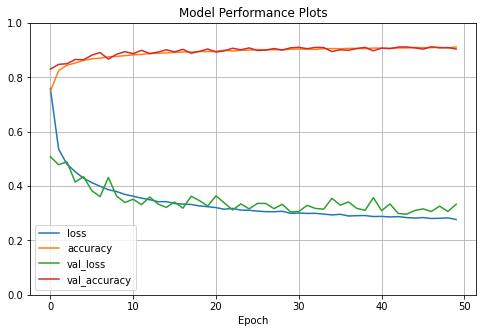

In [27]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Model Performance Plots")
plt.xlabel("Epoch")
plt.show()